# ***Overview***

#### This project analyzes the ride behavior of Cyclistic bike-share users in Chicago, focusing on converting casual riders into annual members.Using 12 months of data, the goal is to identify actionable insights to help convert more casual users into paying members.

# ***Business Task***

#### The marketing team wants to understand how casual riders differ from annual members, with the goal of increasing annual memberships. Our analysis aims to identify patterns and offer actionable insights.

## ***Data Import***

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to the data folder
data_path = r"C:\Users\Ranendra.HOME\Downloads\My space\CASE Studies\Google - cyclist\Data"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(data_path) if file.endswith('.csv')]

# Function to rename columns consistently
def standardize_columns(df):
    col_map = {
        '01 - Rental Details Rental ID': 'trip_id',
        '01 - Rental Details Bike ID': 'bikeid',
        '01 - Rental Details Duration In Seconds Uncapped': 'tripduration',
        '03 - Rental Start Station ID':'from_station_id',
        '01 - Rental Details Local Start Time': 'start_time',
        '02 - Rental End Station ID':'to_station_id',
        '01 - Rental Details Local End Time': 'end_time',
        '03 - Rental Start Station Name': 'from_station_name',
        '02 - Rental End Station Name': 'to_station_name',
        'User Type': 'usertype',
        'Member Gender': 'gender',
        '05 - Member Details Member Birthday Year': 'birthyear'
        # Add more mappings if needed
    }
    return df.rename(columns={k: v for k, v in col_map.items() if k in df.columns})

# Read and clean each file before combining
df_list = []
for file in csv_files:
    df_temp = pd.read_csv(os.path.join(data_path, file))
    df_temp = standardize_columns(df_temp)
    df_list.append(df_temp)

# Combine all data into one DataFrame
df = pd.concat(df_list, ignore_index=True)

# Preview the combined data
print(df.head(5))



    trip_id           start_time             end_time  bikeid tripduration  \
0  21742443  2019-01-01 00:04:37  2019-01-01 00:11:07    2167        390.0   
1  21742444  2019-01-01 00:08:13  2019-01-01 00:15:34    4386        441.0   
2  21742445  2019-01-01 00:13:23  2019-01-01 00:27:12    1524        829.0   
3  21742446  2019-01-01 00:13:45  2019-01-01 00:43:28     252      1,783.0   
4  21742447  2019-01-01 00:14:52  2019-01-01 00:20:56    1170        364.0   

   from_station_id                    from_station_name  to_station_id  \
0              199               Wabash Ave & Grand Ave             84   
1               44               State St & Randolph St            624   
2               15                 Racine Ave & 18th St            644   
3              123       California Ave & Milwaukee Ave            176   
4              173  Mies van der Rohe Way & Chicago Ave             35   

                  to_station_name    usertype  gender  birthyear  
0       Milwaukee A

## ***Exploring Data***

In [66]:
df.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 349.5+ MB


In [68]:
df.shape

(3818004, 12)

In [69]:
# View column names and their data types
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [70]:
df_backup = df.copy()

## ***Cleaning Data***

### ***Fixing data type issues***

In [73]:
 # Converting to datetime:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

In [74]:
 # Converting to numeric column:
df['tripduration'] = pd.to_numeric(df['tripduration'], errors='coerce')

In [75]:
df.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                float64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [76]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [77]:
# Renaming column
df.rename(columns={'usertype': 'member_casual'}, inplace=True)

# Standardizing values
df['member_casual'] = df['member_casual'].str.lower()
df['member_casual'] = df['member_casual'].replace({
    'subscriber': 'member',
    'customer': 'casual'})


### ***Handling Missing Values***

In [79]:
# Checking count of missing values in each column
df.isnull().sum().sort_values(ascending=False)

tripduration         1323213
gender                559206
birthyear             538751
trip_id                    0
start_time                 0
end_time                   0
bikeid                     0
from_station_id            0
from_station_name          0
to_station_id              0
to_station_name            0
member_casual              0
dtype: int64

In [80]:
# To find the unique values in the tripduration column that caused errors when trying to convert them to numbers.

# df.loc[pd.to_numeric(df['tripduration'], errors='coerce').isna(), 'tripduration'].unique()


<Axes: >

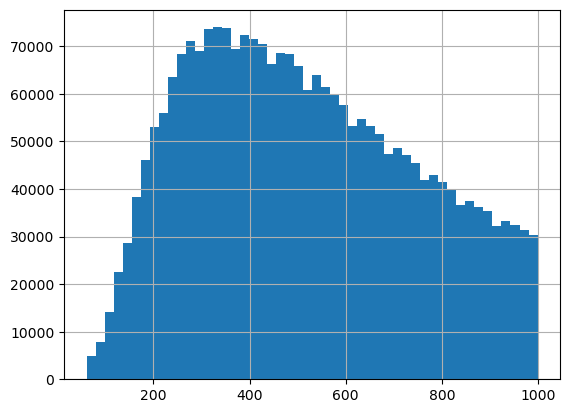

In [81]:
df['tripduration'].hist(bins=50)

In [82]:
# Adding a new column noting the original column was inconsistent
df['tripduration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60
df.rename(columns={'tripduration': 'trip_minutes'}, inplace=True)


In [83]:
df.head()

,trip_id,start_time,end_time,bikeid,trip_minutes,from_station_id,from_station_name,to_station_id,to_station_name,member_casual,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,6.500000,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,7.350000,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,13.816667,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,29.716667,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,6.066667,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member,Male,1994.0


In [84]:
df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
trip_minutes              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
member_casual             0
gender               559206
birthyear            538751
dtype: int64

## ***Exploratory Data Analysis***

### ***Q1: How do annual members and casual riders use Cyclistic bikes differently?***

In [87]:
# 1. Comparing ride length between member types
# Average, median, max ride duration per user type

df.groupby('member_casual')['trip_minutes'].agg(['mean', 'median', 'max', 'count'])


,mean,median,max,count
member_casual,,,,
casual,57.017335,25.833333,177200.366667,880637
member,14.327654,9.800000,150943.900000,2937367


In [88]:
# 2. Analyzing rides by day of the week

# First, creating a column for the day of the week:
df['day_of_week'] = pd.to_datetime(df['start_time']).dt.day_name()

# We already created day_of_week, but let's make sure it's in order:

# Reorder days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

### ***Q2: When do members and casual riders typically ride?***

In [90]:
# Step 1: Extracting hour from start time

# Let’s add a column for hour of day (24-hour format):
df['hour'] = pd.to_datetime(df['start_time']).dt.hour


In [91]:
# Step 2: Ride distribution by hour (for each user type)

# Count number of rides per hour by user type
ride_counts_by_hour = df.groupby(['member_casual', 'hour'], observed=True)['trip_id'].count().reset_index()

ride_counts_by_hour.columns = ['member_casual', 'hour', 'ride_count']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


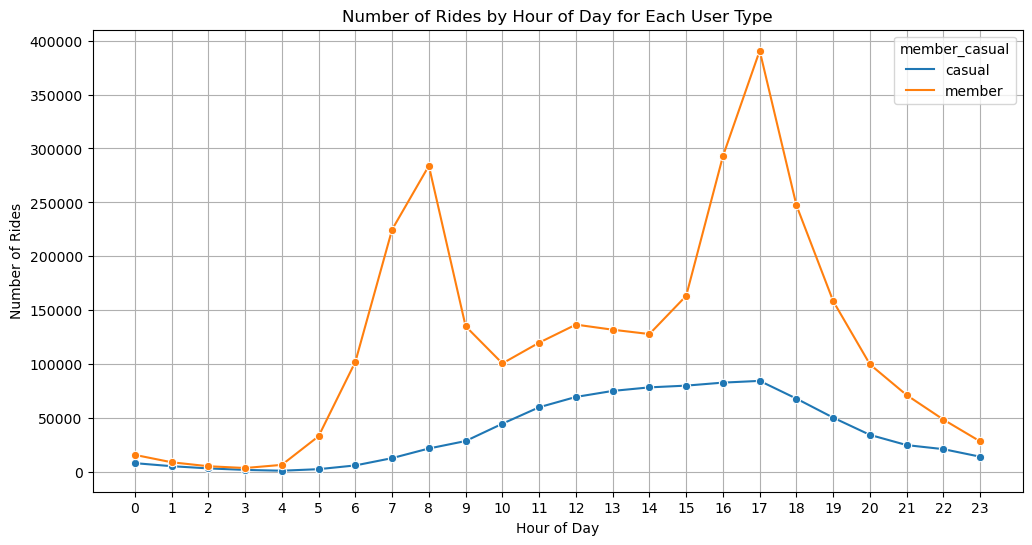

In [92]:
# Visualizing ride counts by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=ride_counts_by_hour, x='hour', y='ride_count', hue='member_casual', marker='o')
plt.title('Number of Rides by Hour of Day for Each User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### ***Q3: Where are the most popular stations used by each rider type?***

In [94]:
# Step 1: Most common start stations for each user type
top_start_stations = df.groupby(['member_casual', 'from_station_name']) \
                               .size().reset_index(name='ride_count') \
                               .sort_values(['member_casual', 'ride_count'], ascending=[True, False])

# Display top 10 for each type
top_start_stations.groupby('member_casual').head(5)


,member_casual,from_station_name,ride_count
559,casual,Streeter Dr & Grand Ave,53104
337,casual,Lake Shore Dr & Monroe St,39238
413,casual,Millennium Park,21749
407,casual,Michigan Ave & Oak St,21388
497,casual,Shedd Aquarium,20617
724,member,Canal St & Adams St,50575
790,member,Clinton St & Madison St,45990
795,member,Clinton St & Washington Blvd,45378
797,member,Columbus Dr & Randolph St,31370
890,member,Franklin St & Monroe St,30832


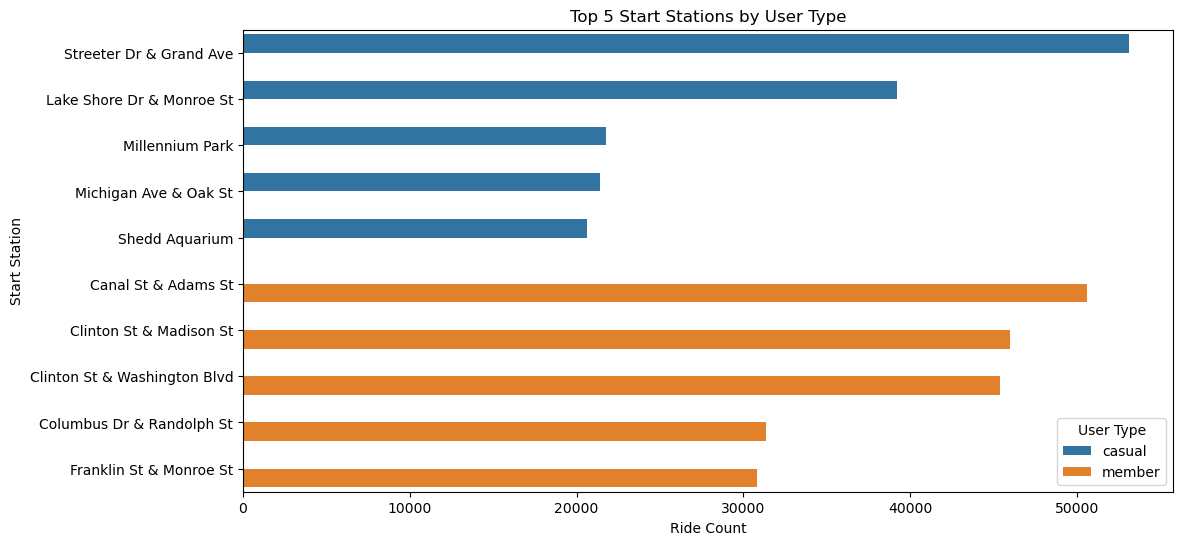

In [95]:
# Visualizing top 5 start stations for each user type

# Top 5 for each type
top5_start = top_start_stations.groupby('member_casual').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top5_start, x='ride_count', y='from_station_name', hue='member_casual')
plt.title('Top 5 Start Stations by User Type')
plt.xlabel('Ride Count')
plt.ylabel('Start Station')
plt.legend(title='User Type')
plt.show()

In [96]:
 # Step 2: Most common end stations for each user type
top_end_stations = df.groupby(['member_casual', 'to_station_name']) \
                             .size().reset_index(name='ride_count') \
                             .sort_values(['member_casual', 'ride_count'], ascending=[True, False])

# Display top 10 for each type
top_end_stations.groupby('member_casual').head(5)


,member_casual,to_station_name,ride_count
561,casual,Streeter Dr & Grand Ave,67585
339,casual,Lake Shore Dr & Monroe St,30673
415,casual,Millennium Park,25215
409,casual,Michigan Ave & Oak St,23691
340,casual,Lake Shore Dr & North Blvd,23278
798,member,Clinton St & Washington Blvd,48193
727,member,Canal St & Adams St,47330
793,member,Clinton St & Madison St,44307
816,member,Daley Center Plaza,30631
962,member,Kingsbury St & Kinzie St,30212


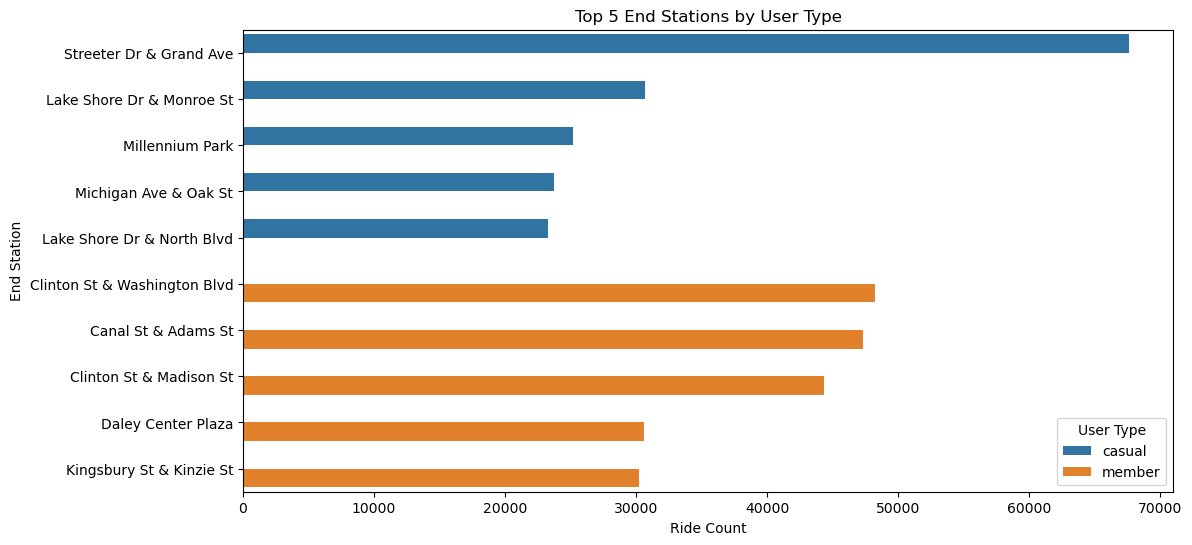

In [97]:
# Visualizing top 5 start stations for each user type

# Top 5 for each type
top5_end = top_end_stations.groupby('member_casual').head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top5_end, x='ride_count', y='to_station_name', hue='member_casual')
plt.title('Top 5 End Stations by User Type')
plt.xlabel('Ride Count')
plt.ylabel('End Station')
plt.legend(title='User Type')
plt.show()

### ***Q4: How long is the average ride by each type of rider?***

In [99]:
# Step 1: Calculating overall average ride duration by rider type
avg_duration_by_type = df.groupby('member_casual')['trip_minutes'].mean().reset_index()

avg_duration_by_type.columns = ['member_casual', 'avg_trip_minutes']

avg_duration_by_type


,member_casual,avg_trip_minutes
0,casual,57.017335
1,member,14.327654


In [100]:
 # Step 2: Average ride time per weekday for each rider type
avg_duration_by_weekday = df.groupby(['member_casual', 'day_of_week'],observed=True)['trip_minutes'].mean().reset_index()

avg_duration_by_weekday.columns = ['member_casual', 'day_of_week', 'avg_trip_minutes']

avg_duration_by_weekday = avg_duration_by_weekday.sort_values(['member_casual', 'day_of_week'])

avg_duration_by_weekday


,member_casual,day_of_week,avg_trip_minutes
0,casual,Monday,54.499889
1,casual,Tuesday,57.413284
2,casual,Wednesday,60.334066
3,casual,Thursday,59.951123
4,casual,Friday,60.175611
5,casual,Saturday,54.061110
6,casual,Sunday,56.181687
7,member,Monday,14.249284
8,member,Tuesday,14.152592
9,member,Wednesday,13.809845


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


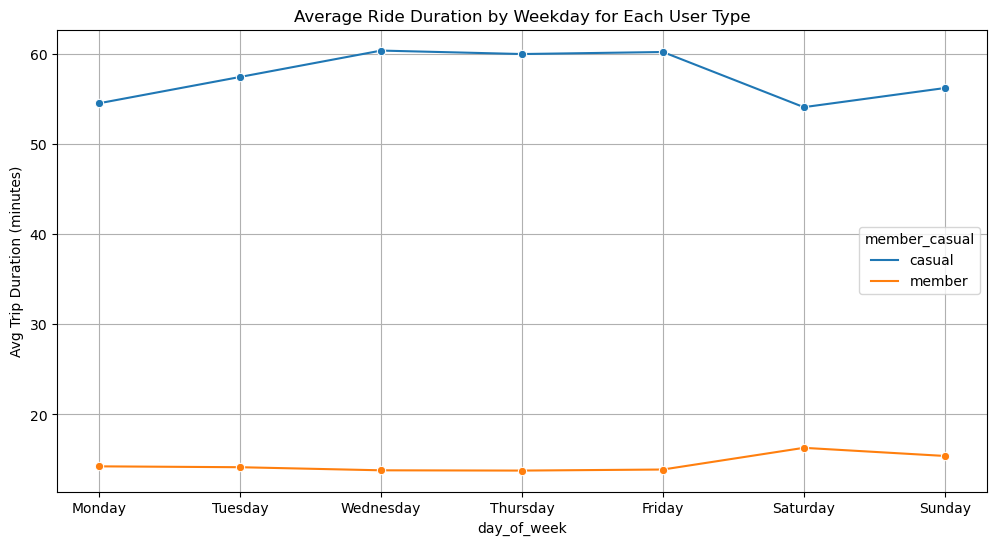

In [101]:
# Visualizationing Average ride time per weekday
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_by_weekday, x='day_of_week', y='avg_trip_minutes', hue='member_casual', marker='o')
plt.title('Average Ride Duration by Weekday for Each User Type')
plt.xlabel('day_of_week')
plt.ylabel('Avg Trip Duration (minutes)')
# plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### ***Q5: What days do riders ride the most?***

In [103]:
# This question helps us understand peak usage days for casual and member riders.

# Step 1: Counting number of rides per weekday for each rider type
ride_counts_by_weekday = df.groupby(['member_casual', 'day_of_week'])['trip_id'].count().reset_index()

ride_counts_by_weekday.columns = ['member_casual', 'day_of_week', 'ride_count']

# Ensure weekdays are in order
# ride_counts_by_weekday['day_of_week'] = pd.Categorical(ride_counts_by_weekday['days_order'],
                                                    # categories=days_order,
                                                    # ordered=True)

ride_counts_by_weekday = ride_counts_by_weekday.sort_values(['member_casual', 'day_of_week'])

ride_counts_by_weekday


C:\Users\Ranendra.HOME\AppData\Local\Temp\ipykernel_14072\2956965829.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride_counts_by_weekday = df.groupby(['member_casual', 'day_of_week'])['trip_id'].count().reset_index()


,member_casual,day_of_week,ride_count
0,casual,Monday,101489
1,casual,Tuesday,88655
2,casual,Wednesday,89745
3,casual,Thursday,101372
4,casual,Friday,121141
5,casual,Saturday,208056
6,casual,Sunday,170179
7,member,Monday,458780
8,member,Tuesday,497025
9,member,Wednesday,494277


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


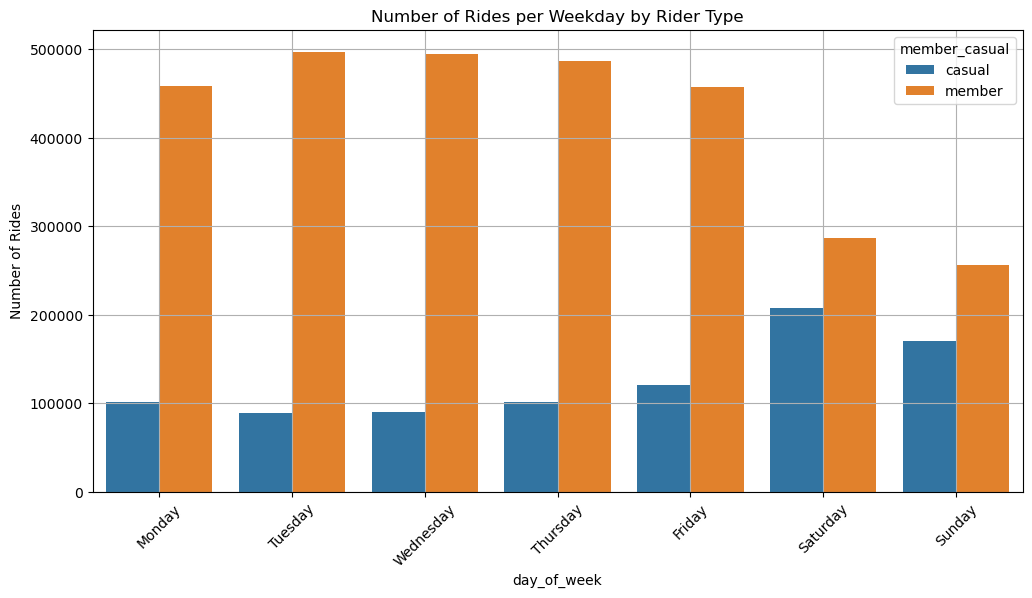

In [104]:
# Visualizing ride count per weekday
plt.figure(figsize=(12, 6))
sns.barplot(data=ride_counts_by_weekday, x='day_of_week', y='ride_count', hue='member_casual')
plt.title('Number of Rides per Weekday by Rider Type')
plt.xlabel('day_of_week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### ***Q6: How do ride trends change month-over-month?***

In [106]:
# This helps identify seasonality or growth trends in user engagement.

# Step 1: Extracting month and year
df['month_year'] = df['start_time'].dt.to_period('M')

# This converts dates like 2022-04-15 to 2022-04.

In [107]:
 # Step 2: Grouping data by month and user type
monthly_rides = df.groupby(['month_year', 'member_casual'])['trip_id'].count().reset_index()

monthly_rides.columns = ['month_year', 'member_casual', 'ride_count']

In [108]:
monthly_rides['month_year'] = monthly_rides['month_year'].astype(str)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


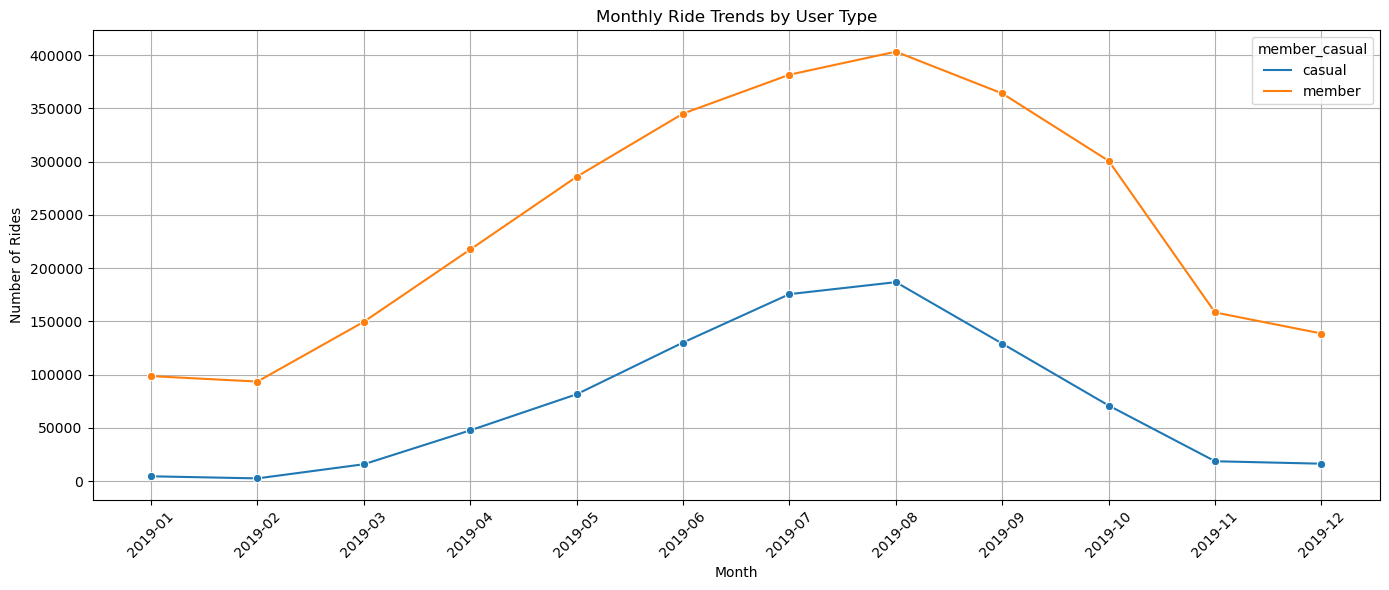

In [109]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_rides, x='month_year', y='ride_count', hue='member_casual', marker='o')
plt.title('Monthly Ride Trends by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## ***Conclusion:***

### Key Observations:
 
#### <u>Rider Type Behavior</u>:

- Members take more frequent but shorter rides, likely for commuting or quick errands.

- Casual riders take longer rides, often during weekends or holidays — possibly for leisure or exploration.

#### <u>Temporal Trends</u>:

- Members ride more consistently during weekdays, especially during morning and evening peak hours (commute times).

- Casuals prefer afternoons and weekends, with activity peaking between 12 PM to 6 PM.

#### <u>Ride Duration</u>:

- Casual riders consistently have higher average ride durations, which may indicate less familiarity with the system or more exploratory behavior.

#### <u>Station Popularity</u>:

- Certain stations appear frequently in both start and end points, showing high-traffic hubs — ideal for targeted promotions or better bike availability.

#### <u>Seasonality</u>:

- There is a clear rise in casual ridership during summer months, aligning with better weather and tourism.

## ***Business Insights:***

#### <u>Opportunity to Convert Casuals to Members</u>:

- Casual riders exhibit regular behavior patterns — especially on weekends. Targeting these users with weekend-specific "limited trial memberships" could convert them.

#### <u>Fleet and Station Optimization</u>:

- Since peak usage hours and stations are known, redistribution of bikes and staffing can be planned more efficiently.

#### <u>Marketing Strategy</u>:

- Casual riders can be targeted with experience-based offers, like guided bike tours or weekend bundle packages.

- Members can be retained by offering loyalty perks or work commute-related incentives.

## ***Recommendations:***


- Target casual riders who ride often but haven’t converted — offer promo codes and in-app nudges to try membership for a week.

- Strengthen inventory at high-demand stations during peak hours and seasons using predictive models.

- Run seasonal campaigns (e.g., summer rides, holiday-themed routes) focused on casual users.

## ***Limitations:***


- Missing values in `gender` and `birthyear` but does not affect our analysis.
- No geolocation data available for mapping analysis.
